In [1]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display first five rows
tesla_data.head()

ModuleNotFoundError: No module named 'yfinance'

In [2]:
!pip install yfinance --upgrade --no-cache-dir
!pip install pandas requests beautifulsoup4 plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 296.0 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 330.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 476.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 296.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=303801 sha256=4209f509ef8d5f9c610a70c0e010a4a5fd69a43742ded2052a7c5ba21739e75f
  Stored in directory: /tmp/pip-ephem-wheel-cache-_vrkhtzr/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee


In [3]:
try:
    import yfinance as yf
    import pandas as pd
    import requests
    from bs4 import BeautifulSoup
    import plotly.graph_objects as go
    print("All packages imported successfully!")
except ImportError as e:
    print(f"Error importing packages: {e}")

All packages imported successfully!


In [6]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}
try:
    # Fetch the webpage with headers to avoid blocking
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Check for HTTP errors
    
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all tables - we need the quarterly revenue table
    tables = soup.find_all('table')
    
    # Initialize DataFrame
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
    
    # Find the correct table (looking for "Quarterly Revenue")
    for table in tables:
        if 'Quarterly Revenue' in table.text:
            # Extract data from the correct table
            for row in table.find('tbody').find_all('tr'):
                cols = row.find_all('td')
                if len(cols) >= 2:
                    date = cols[0].text.strip()
                    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
                    if revenue:  # Only add if revenue value exists
                        tesla_revenue = pd.concat([
                            tesla_revenue,
                            pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                        ], ignore_index=True)
            break  # Exit loop once we find the right table
    
    # Convert Revenue to numeric and drop empty rows
    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
    tesla_revenue = tesla_revenue.dropna()
    
    # Display last five rows
    print("Tesla Quarterly Revenue Data (Last 5 rows):")
    display(tesla_revenue.tail())
    
except Exception as e:
    print(f"Error occurred: {e}")
    # Create empty DataFrame if scraping fails
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

Tesla Quarterly Revenue Data (Last 5 rows):


,Date,Revenue
58,2010-09-30,31
59,2010-06-30,28
60,2010-03-31,21
61,2009-09-30,46
62,2009-06-30,27


In [10]:
import yfinance as yf
import pandas as pd

# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index to make Date a column instead of an index
gme_data.reset_index(inplace=True)

# Display the first five rows
print("GameStop Stock Data - First 5 Rows:")
display(gme_data.head())

GameStop Stock Data - First 5 Rows:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Set headers to avoid being blocked
headers = {'User-Agent': 'Mozilla/5.0'}

try:
    # Fetch webpage
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Check for HTTP errors
    
    # Parse HTML
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all tables - we need the quarterly revenue table
    tables = soup.find_all('table')
    
    # Initialize DataFrame
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
    
    # Find the correct table (looking for "Quarterly Revenue")
    for table in tables:
        if 'Quarterly Revenue' in table.text:
            # Extract data from the correct table
            for row in table.find('tbody').find_all('tr'):
                cols = row.find_all('td')
                if len(cols) >= 2:
                    date = cols[0].text.strip()
                    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
                    if revenue:  # Only add if revenue value exists
                        gme_revenue = pd.concat([
                            gme_revenue,
                            pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                        ], ignore_index=True)
            break  # Exit loop once we find the right table
    
    # Convert Revenue to numeric and drop empty rows
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
    gme_revenue = gme_revenue.dropna()
    
    # Display last five rows
    print("GameStop Quarterly Revenue Data (Last 5 rows):")
    display(gme_revenue.tail())
    
except Exception as e:
    print(f"Error occurred: {e}")
    # Create empty DataFrame if scraping fails
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

GameStop Quarterly Revenue Data (Last 5 rows):


,Date,Revenue
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981
65,2009-01-31,3492


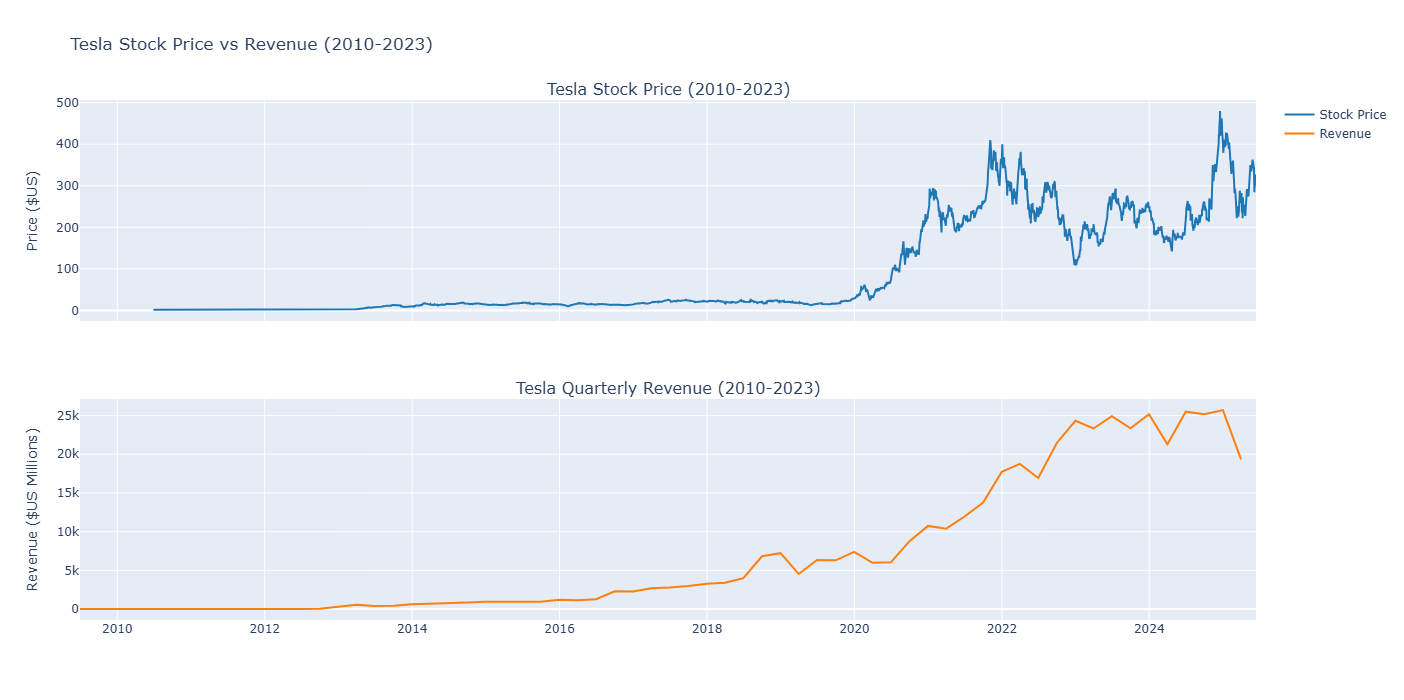

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, title):
    """
    Creates a dashboard with stock price and revenue charts
    Args:
        stock_data (DataFrame): DataFrame with stock data
        revenue_data (DataFrame): DataFrame with revenue data
        title (str): Title for the dashboard
    """
    # Create figure with secondary y-axis
    fig = make_subplots(rows=2, cols=1, 
                       shared_xaxes=True, 
                       subplot_titles=("Tesla Stock Price (2010-2023)", 
                                      "Tesla Quarterly Revenue (2010-2023)"), 
                       vertical_spacing=0.15)
    
    # Stock Price Chart (Top)
    fig.add_trace(
        go.Scatter(
            x=stock_data["Date"],
            y=stock_data["Close"],
            name="Stock Price",
            line=dict(color="#1f77b4")
        ),
        row=1, col=1
    )
    
    # Revenue Chart (Bottom)
    fig.add_trace(
        go.Scatter(
            x=revenue_data["Date"],
            y=revenue_data["Revenue"],
            name="Revenue",
            line=dict(color="#ff7f0e")
        ),
        row=2, col=1
    )
    
    # Update layout
    fig.update_layout(
        height=700,
        title_text=title,
        hovermode="x unified"
    )
    
    # Update y-axis titles
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Show the figure
    fig.show()

# Call the function with Tesla data
make_graph(tesla_data, tesla_revenue, "Tesla Stock Price vs Revenue (2010-2023)")

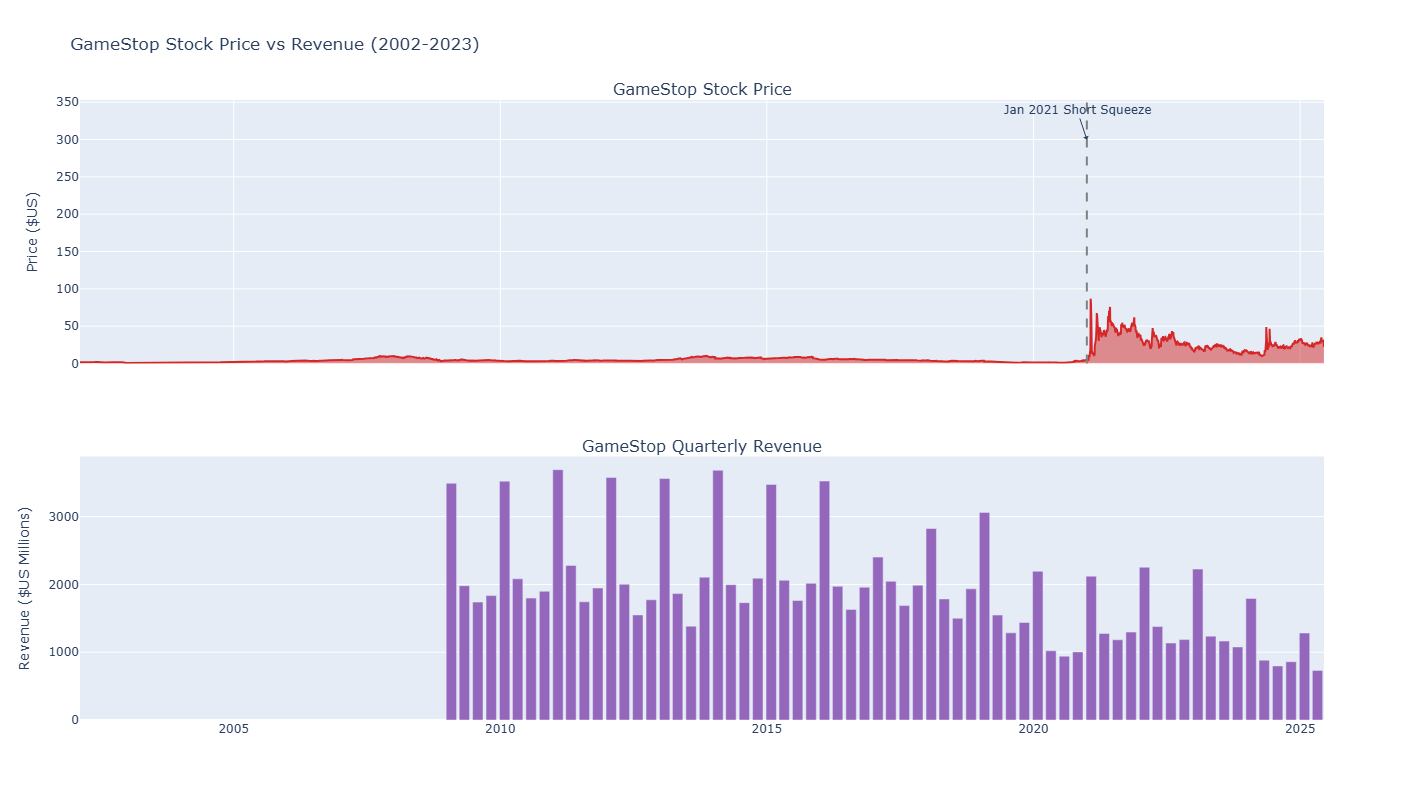

In [14]:
# Use the same make_graph function from Question 5
def make_graph(stock_data, revenue_data, title):
    fig = make_subplots(rows=2, cols=1, 
                       shared_xaxes=True, 
                       subplot_titles=(f"{title} Stock Price", 
                                      f"{title} Quarterly Revenue"), 
                       vertical_spacing=0.15)
    
    # Stock Price Chart (Top)
    fig.add_trace(
        go.Scatter(
            x=stock_data["Date"],
            y=stock_data["Close"],
            name="Stock Price",
            line=dict(color="#d62728"),  # Red color for GME
            fill='tozeroy'  # Add fill below line
        ),
        row=1, col=1
    )
    
    # Revenue Chart (Bottom)
    fig.add_trace(
        go.Bar(  # Using bars for revenue for better visualization
            x=revenue_data["Date"],
            y=revenue_data["Revenue"],
            name="Revenue",
            marker_color="#9467bd"  # Purple color
        ),
        row=2, col=1
    )
    
    # Add vertical line for January 2021 short squeeze
    fig.add_vline(
        x=pd.to_datetime("2021-01-01"), 
        line_width=2, 
        line_dash="dash", 
        line_color="gray",
        row=1, col=1
    )
    
    # Update layout
    fig.update_layout(
        height=800,
        title_text=f"{title} Stock Price vs Revenue (2002-2023)",
        hovermode="x unified",
        showlegend=False
    )
    
    # Update axes
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Add annotation for the short squeeze
    fig.add_annotation(
        x=pd.to_datetime("2021-01-01"),
        y=300,
        text="Jan 2021 Short Squeeze",
        showarrow=True,
        arrowhead=1,
        row=1,
        col=1
    )
    
    fig.show()

# Generate the GameStop dashboard
make_graph(gme_data, gme_revenue, "GameStop")